# UTS MACHINE LEARNING

### Nama: Magfiroh Indah Karisma
### NIM: 2141720180

## Ketentuan UTS

Berdasarkan pemaparan kasus, Anda diminta untuk,

1. Pilih 5 citra plat nomor untuk setiap anggota kelompok dari dataset yang telah disediakan. [DOWNLOAD](https://storage.googleapis.com/kuliah_mah/dummy.zip)
2. Lakukan segmentasi pada citra plat nomor untuk memperjelas karakter pada plat nomor.
3. Anda dapat menggunakan algortima K-Means seperti yang telah dijelaskan pada praktikum sebelumnya atau menggunakan algoritma klasterisasi yang lain.
4. Anda diperkenankan untuk melakukan pra pengolahan data (preprocessing) pada citra seperti,
    - Merubah color space
    - Reduksi dimensi
    - dsb
5. Tampilkan perbandingan citra antara sebelum dan sesudah di segmentasi

**Open Challange** (Opsional)
 - Bagaimana cara melakukan evaluasi pada hasil segementasi?
 - Terapkan pada kasus ini!


**Catatan:**
1. Proses loading citra dicontohkan dengan menggunakan library openCV
2. Secara default, openCV akan memuat citra dalam format BGR

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


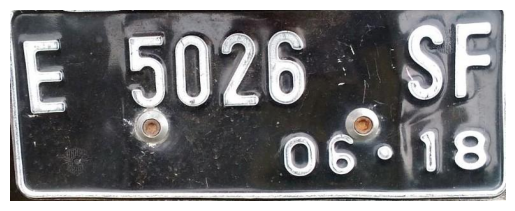

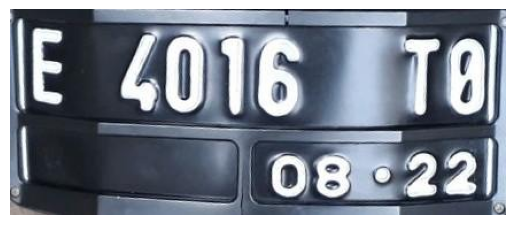

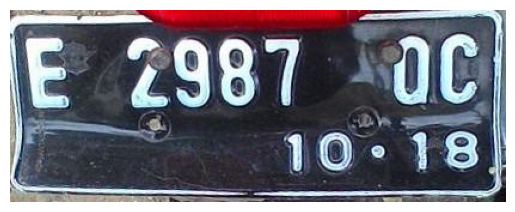

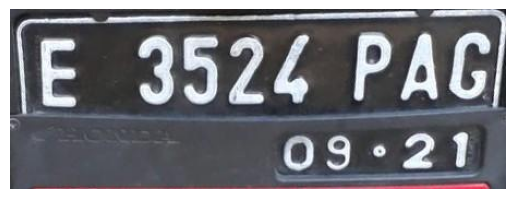

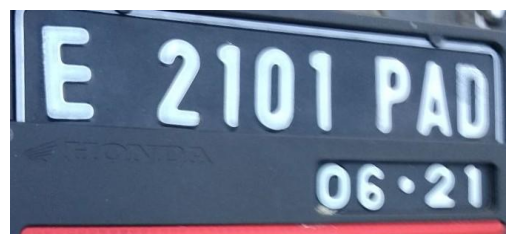

In [5]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow  # Mengimpor cv2_imshow dari Google Colab

directory = "/content/drive/MyDrive/Study/Mach Learning/data"

# Mengambil daftar file gambar dalam direktori yang diidentifikasi oleh 'directory'
image_files = [file for file in os.listdir(directory) if file.endswith((".jpg", ".jpeg", ".png"))]

# Loop melalui semua file gambar dalam daftar 'image_files'
for img_file in image_files:
    img_path = os.path.join(directory, img_file)  # Membuat path lengkap ke file gambar

    img = cv2.imread(img_path)  # Membaca gambar menggunakan OpenCV

    # Menampilkan gambar menggunakan matplotlib
    plt.figure()  # Membuat figur baru
    plt.axis('off')  # Tidak menampilkan sumbu
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))  # Menampilkan gambar dengan menerjemahkan dari BGR ke RGB
    plt.show()  # Menampilkan figur gambar


File: 5.jpg
Tinggi: 300
Lebar: 778
Jumlah Saluran Warna: 3


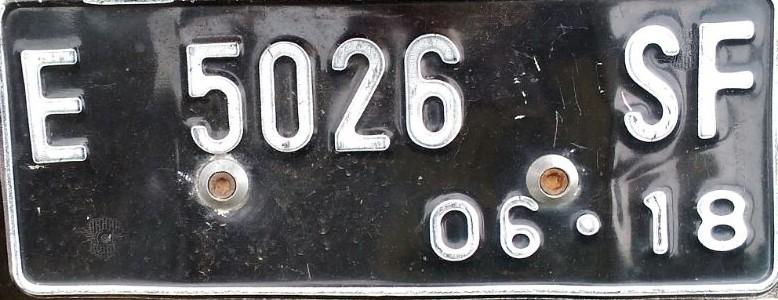

File: 2.jpg
Tinggi: 179
Lebar: 432
Jumlah Saluran Warna: 3


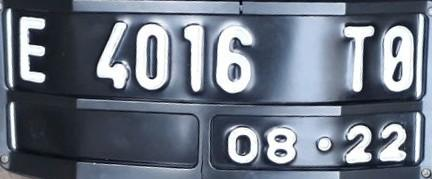

File: 4.jpg
Tinggi: 161
Lebar: 415
Jumlah Saluran Warna: 3


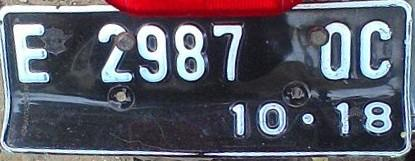

File: 3.jpg
Tinggi: 165
Lebar: 455
Jumlah Saluran Warna: 3


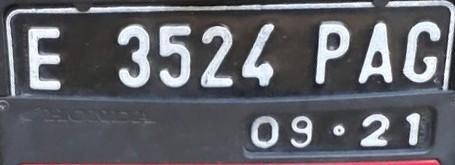

File: 1.jpg
Tinggi: 303
Lebar: 670
Jumlah Saluran Warna: 3


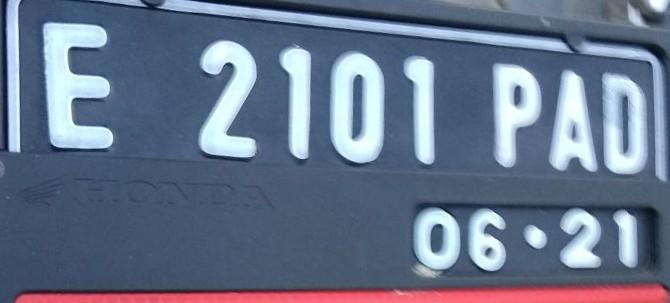

In [10]:
image_files = [file for file in os.listdir(directory) if file.endswith((".jpg", ".jpeg", ".png"))]

# Loop melalui semua file gambar dalam daftar 'image_files'
for img_file in image_files:
    img_path = os.path.join(directory, img_file)  # Membuat path lengkap ke file gambar

    img = cv2.imread(img_path)  # Membaca gambar menggunakan OpenCV

    # Mendapatkan dimensi gambar dan jumlah saluran warna
    h, w, ch = img.shape
    print(f"File: {img_file}")
    print(f"Tinggi: {h}")
    print(f"Lebar: {w}")
    print(f"Jumlah Saluran Warna: {ch}")

    # Melanjutkan pemrosesan gambar seperti yang Anda inginkan
    # Misalnya, Anda dapat mengonversi nilai piksel, mengubah bentuk data, dan melakukan operasi lainnya pada gambar di sini.

    # Menampilkan gambar
    cv2_imshow(img)

# Pastikan untuk menutup jendela gambar setelah selesai
cv2.waitKey(0)
cv2.destroyAllWindows()

In [11]:
# Mengambil daftar file gambar dalam direktori yang diidentifikasi oleh 'directory'
image_files = [file for file in os.listdir(directory) if file.endswith((".jpg", ".jpeg", ".png"))]

# Inisialisasi list untuk menyimpan semua data gambar yang telah diproses
all_data = []

# Loop melalui semua file gambar dalam daftar 'image_files'
for img_file in image_files:
    img_path = os.path.join(directory, img_file)  # Membuat path lengkap ke file gambar

    img = cv2.imread(img_path)  # Membaca gambar menggunakan OpenCV

    # Mendapatkan dimensi gambar dan jumlah saluran warna
    h, w, ch = img.shape

    # Mengonversi nilai piksel gambar menjadi rentang [0, 1] dengan membagi semua nilai oleh 255.0
    data = img / 255.0

    # Mengubah bentuk data gambar menjadi bentuk yang dapat digunakan untuk pemrosesan
    data = data.reshape(h * w, ch)

    # Menambahkan data gambar ke dalam list
    all_data.append(data)

# Menggabungkan semua data gambar menjadi satu array besar
all_data = np.concatenate(all_data, axis=0)

# Mencetak bentuk (shape) dari data gabungan
print("Bentuk Data Gabungan:", all_data.shape)

Bentuk Data Gabungan: (655628, 3)


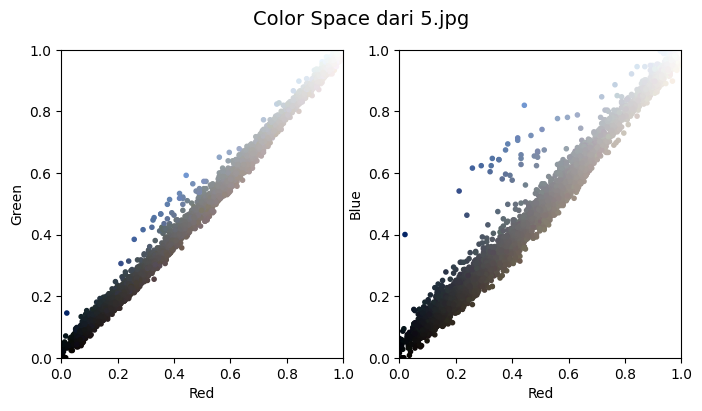

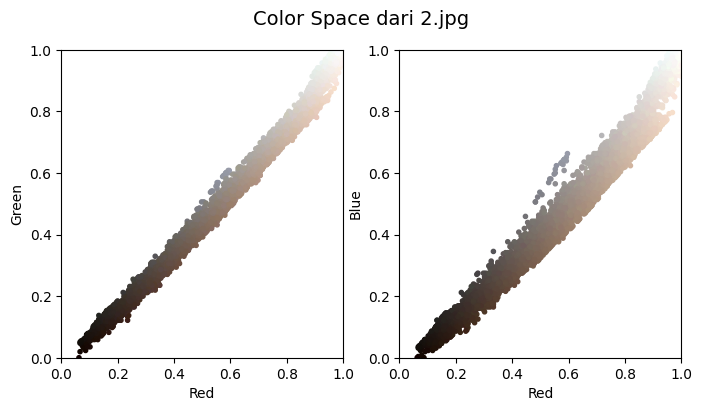

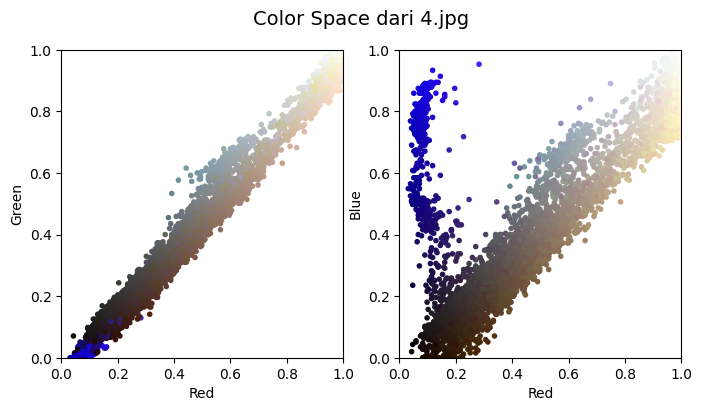

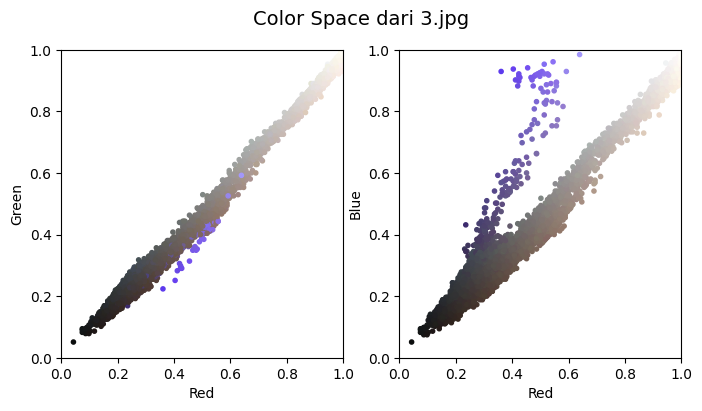

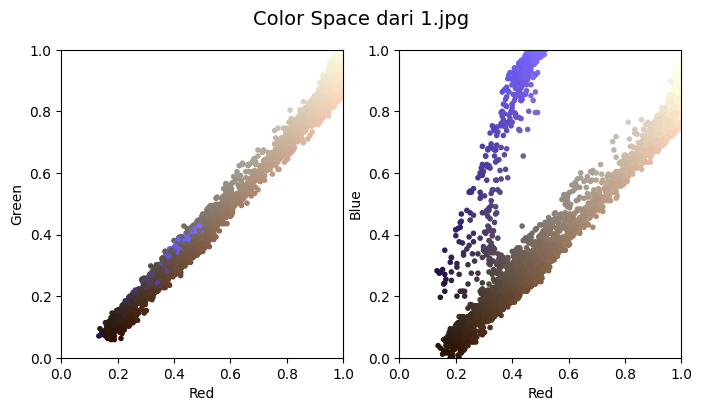

In [13]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data

    # Memilih random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T

    fig, ax = plt.subplots(1, 2, figsize=(8, 4))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=14)

directory = "/content/drive/MyDrive/Study/Mach Learning/data"

# Mengambil daftar file gambar dalam direktori yang diidentifikasi oleh 'directory'
image_files = [file for file in os.listdir(directory) if file.endswith((".jpg", ".jpeg", ".png"))]

# Loop melalui semua file gambar dalam daftar 'image_files'
for img_file in image_files:
    img_path = os.path.join(directory, img_file)  # Membuat path lengkap ke file gambar

    img = cv2.imread(img_path)  # Membaca gambar menggunakan OpenCV

    # Mendapatkan dimensi gambar dan jumlah saluran warna
    h, w, ch = img.shape

    # Mengonversi nilai piksel gambar menjadi rentang [0, 1] dengan membagi semua nilai oleh 255.0
    data = img / 255.0

    # Mengubah bentuk data gambar menjadi bentuk yang dapat digunakan untuk pemrosesan
    data = data.reshape(h * w, ch)

    # Memanggil fungsi plot_pixels untuk memvisualisasikan warna dalam gambar
    plot_pixels(data, title=f'Color Space dari {img_file}')

# Pastikan untuk menutup jendela plot setelah selesai
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


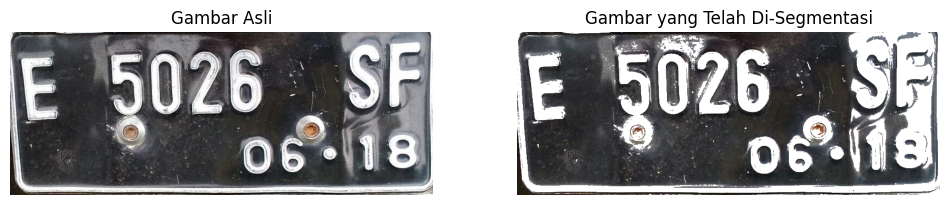

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


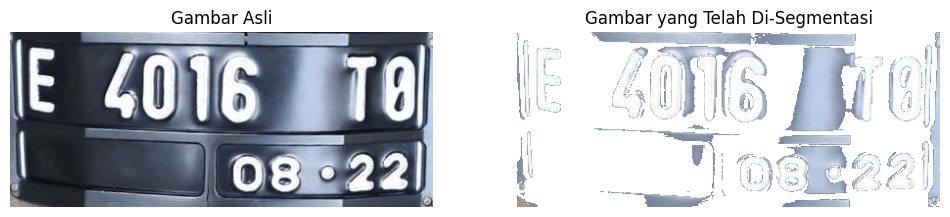

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


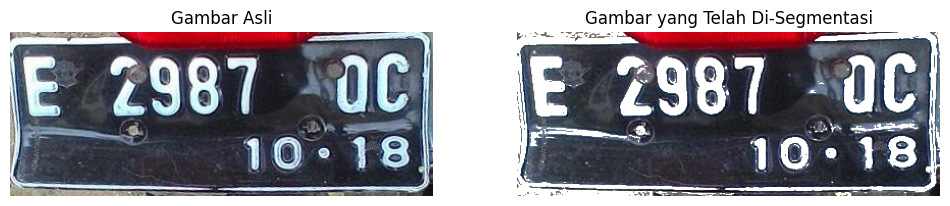

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


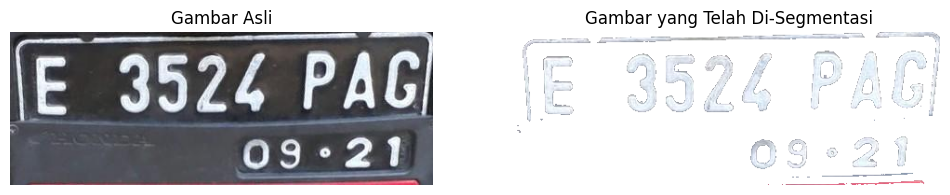

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


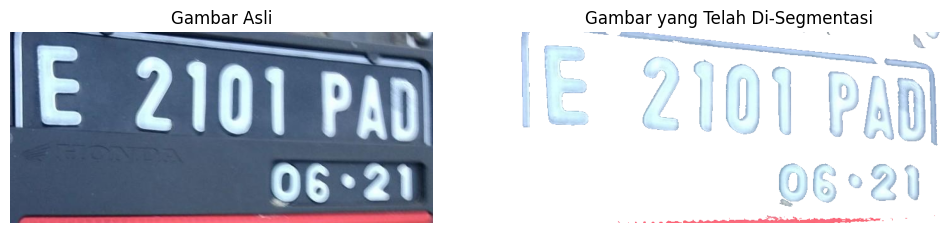

In [14]:
from sklearn.cluster import KMeans

directory = "/content/drive/MyDrive/Study/Mach Learning/data"

# Mengambil daftar file gambar dalam direktori yang diidentifikasi oleh 'directory'
image_files = [file for file in os.listdir(directory) if file.endswith((".jpg", ".jpeg", ".png"))]

# Inisialisasi jumlah klaster yang diinginkan
jumlah_klaster = 2

# Loop melalui semua file gambar dalam daftar 'image_files'
for img_file in image_files:
    img_path = os.path.join(directory, img_file)  # Membuat path lengkap ke file gambar

    img = cv2.imread(img_path)  # Membaca gambar menggunakan OpenCV

    # Menggunakan K-Means untuk melakukan segmentasi warna
    citra_reshape = img.reshape((-1, 3))
    kmeans = KMeans(n_clusters=jumlah_klaster)
    kmeans.fit(citra_reshape)
    label_klaster = kmeans.labels_.reshape(img.shape[:2])

    # Misalnya, Anda dapat menunjukkan klaster pertama (0) sebagai warna merah
    citra_segmentasi = img.copy()
    citra_segmentasi[label_klaster == 0] = [255, 255, 255]

    # Menampilkan gambar asli dan gambar yang telah di-segmentasi
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))
    ax[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    ax[0].set_title("Gambar Asli")
    ax[0].axis('off')
    ax[1].imshow(cv2.cvtColor(citra_segmentasi, cv2.COLOR_BGR2RGB))
    ax[1].set_title("Gambar yang Telah Di-Segmentasi")
    ax[1].axis('off')
    plt.show()

# Pastikan untuk menutup jendela plot setelah selesai
cv2.waitKey(0)
cv2.destroyAllWindows()